# A1 - Trace-Event Simulation Assignment
### Year 2020-2021  - Semester II
### CCE3502
#### Developed by - Adrian Muscat, 2021
---

# Wayne Falzon, 225401L, BsC Cs and Mathematics, Yr-II, CCE3502


In this assignment you will be
1. implementing the trace-event simulation algorithm for systems involving one queue and one service node, 
2. verifying the model using known results,
2. validating the model using the analytical M/M/1 model, and
3. generating the output for a given problem.

NOTES: 
1. The first few questions are not graded (lab-work), whereas the last three numbered questions are graded (home-work).

3. The assignment is worth 20% of the final unit mark.

2. This assignment is to be attempted individually. It is essential that the work you submit and present consists only of your own work; use of copied material will be treated as plagiarism. Discussion is only permitted on general issues, and it is absolutely forbidden to discuss specific details with anyone.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# this line plots graphs in line
%matplotlib inline

## In this assignment you will use the example model from the Discrete_Event_Simulation class notes to verify your model and output analysis functions. 


In [3]:
a = np.array([1,2,3,4,5]) #Below are some warmup excerises done in class
b = np.array([6,7,8,9,10])
print(a+b) # these two cells (3 and 4) show addition in two different ways 

[ 7  9 11 13 15]


In [4]:
c =np.zeros(5)
for i in range(len(a)):
    c[i] = a[i] +b[i]
print(c)

[ 7.  9. 11. 13. 15.]


In [5]:
a = np.random.exponential(5, size=5) # samples from parameterised exponential distribution 
print(a) # array is the size and the first parameter is 1/lamda (lamda is similar to rate)

[13.10068224  5.66078987  0.88933005  3.75592903  0.08537757]


In [6]:
a = np.random.normal(scale = 1.0, loc=0.0, size=(5,5))
print(a)

[[-1.29477654e+00  3.05144109e+00 -6.93375340e-01  4.39561580e-03
  -1.54465700e-01]
 [ 7.15729824e-01 -4.11048257e-01 -2.90572884e-01  5.60569521e-01
  -5.07223449e-01]
 [ 1.07571903e+00 -3.60603890e-01  1.13515160e+00 -6.45283415e-01
   4.89474544e-01]
 [ 4.64048614e-01  7.08742687e-02 -4.78271030e-01  2.29374081e-03
  -2.46223535e-01]
 [-1.10630715e+00  2.55169060e-01 -4.22043845e-01  1.36979421e+00
  -1.83437417e+00]]


In [7]:
a.shape # to get dimensions 

(5, 5)

In [8]:
a.flatten().shape #note how they are combined (5*5)

(25,)

In [9]:
a = np.random.normal(scale=1.0,loc=0.0, size=(100))
my_bins = np.arange(-5,6,1) 
print(my_bins)
print(my_bins.shape)
h =np.histogram(a)
print(h)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
(11,)
(array([ 2,  4, 10, 16, 19, 16, 18,  8,  4,  3]), array([-2.51099472, -2.01263561, -1.51427649, -1.01591738, -0.51755827,
       -0.01919915,  0.47915996,  0.97751907,  1.47587819,  1.9742373 ,
        2.47259641]))


In [10]:
print(b[1:3]) #prints element 1 and 2
print(b[-1]) #prints last element
print(b[-2:]) #prints two elements from the end
print(b)

[7 8]
10
[ 9 10]
[ 6  7  8  9 10]


[0.   0.   0.02 0.13 0.37 0.31 0.13 0.04 0.   0.  ]
[-5 -4 -3 -2 -1  0  1  2  3  4  5]


<BarContainer object of 10 artists>

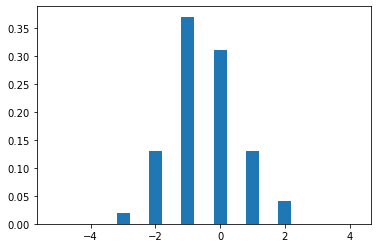

In [11]:
a = np.random.normal(scale=1.0,loc=0.0, size=(100))
my_bins = np.arange(-5,6,1) 
h = np.histogram(a,bins=my_bins)
F = h[0]/len(a) #is holding the values of the histogram. The division is to normalise s.t adding the heights makes it sum to 1
B = h[1] #holding the range 
print(F)
print(B)
plt.bar(B[:-1],F,width=0.4) #printing across B with values of F. First param tells us where and the second gives the height
#Third param denotes the width of the bars 

## Exercises in class: 
## Code the trace event algorithm (see details and assumptions for the single server single queue system in the class notes) as a function that takes an array of arrival times and another array of service times and outputs  an array of delay times.

In [12]:
def get_delay_time(arrival_time, service_time):
    """
    arrival_time is an array of arrival times (a_i)
    service_time is an array of service times (s_i)
    where _i is an index to job or customer i (see class notes)
    """
    delay_time = np.zeros(len(arrival_time)) #note d[0] = 0 by definition 
    dep_time = np.zeros(len(arrival_time))
   
    for i in range(len(arrival_time)): 
        if (i==0):
            dep_time[i] = arrival_time[i] + service_time[i] #when i=0, delay_time_i is 0 
            continue
        else:
            dep_time[i-1] = delay_time[i-1] + arrival_time[i-1] + service_time[i-1] #formula for deperature
            
            if (dep_time[i-1] > arrival_time[i]): #condition on setting the delay time 
                delay_time[i] = dep_time[i-1] - arrival_time[i]
            else: 
                delay_time[i] = 0.0
                  
    return delay_time #returning the delay time 

## Verify the trace event function using known  results,  from the example in class notes.

In [13]:
#a and s are arrays to store the arrival time and service time respectively 
a = np.array([15., 47., 71., 111., 123., 152., 166., 226., 310., 320.])
s = np.array([43., 36., 34., 30., 38., 40., 31., 29., 36., 30.])

d = get_delay_time(a,s) #d will hold the delay time 
print(d)

[ 0. 11. 23. 17. 35. 44. 70. 41.  0. 26.]


## As a visual test for the trace-event function plot the cumulative arrivals and departures versus time, as a piece-wise constant plot.

In [14]:
c = a+s+d #c will hold the departure time 
y = np.arange(len(a)) #defining the time axis
print(y)

[0 1 2 3 4 5 6 7 8 9]


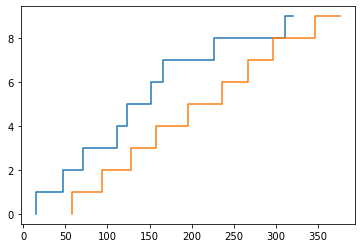

In [15]:
plt.step(a,y,where='pre') #plotting cumulative arrivals and deperatures against time 
plt.step(c,y, where='pre')

## Verify the cumulative arrival and departures  plot using known  results,  from the example in class notes.

# GRADED QUESTIONS START HERE

## Question 1
## Develop a function to plot the number of customers in the system versus time and use known results to verify it. 
### Hint: The plot is  also a piecewise constant graph
## [30 marks] 

In [16]:
def CustomersInSystem(cumArrivals,cumDepartures):
    
    
    total_times = np.zeros(len(cumArrivals)+len(cumDepartures) + 1)
    total_times = np.concatenate([cumArrivals,cumDepartures,[0]]) #The two arrays are combined into 1, 0 is also added as time 
    #Therefore this array will contain all the times
    
    jobs_sys = np.zeros(len(total_times)) #an array to store the jobs in the system according to the time is created
    
    total_times.sort() # the times are set in order
    
    count = 0 #a counter to keep track of the jobs is made 
    
    for i in range(len(total_times)): #for each of the times 
        if(i==0): #initially the jobs in the system are always 0 
            continue
        
        if(total_times[i] in cumArrivals): #we check if the current time is an arrival time 
                count += 1 #the counter is incremented appropriately 
        
        if(total_times[i] in cumDepartures): #or if it is a departure
                count -= 1
                
        jobs_sys[i] = count # the jobs in the system are set 
        
    plt.step(total_times,jobs_sys,where='post') #plotting jobs in the system vs time 
    plt.title("Jobs in System vs Time")
    #Graph below is identical to that found in the notes 
    
    return jobs_sys, total_times #to be used for the second question 

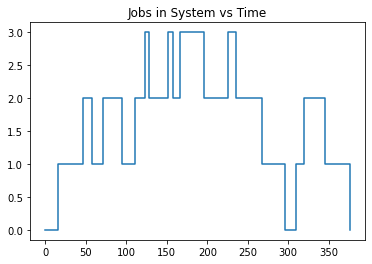

In [17]:
l_t, time = CustomersInSystem(a,c) # function call where cumulative arrivals and departures are passed 
#returns are irrelevant for this question 
#Result matches that found in the notes

## Question 2 
## Develop a  function to calculate the average number of customers in the system, and use known results from the example in the class notes to verify the function.
## [20 marks]

In [18]:
def AverageCustomers(l_t,time):
        
    widthOfRectangles = np.zeros(len(time)-1)
    areaOfRectangles = np.zeros(len(time)-1)
    
    for i in range(len(time)): # at each time 
        if(i == len(time)-1): #prevent out of bounds error
            break
        else:
            widthOfRectangles[i] = time[i+1] - time[i] #finding the width of each rectangle 
            areaOfRectangles[i] = l_t[i] * widthOfRectangles[i] #the area of each rectangle is found 
            
    totalArea = np.sum(areaOfRectangles) #summing all the areas
    totalTime = time[len(time)-1] - time[0] #finding the total time 
    #We note this is the proper way to calculate time since it may not always start from 0 
    average = totalArea/totalTime #finding the average by diving the total area by total time 
    #returning the average number of customers in the system 
    return average


In [19]:
l_t, time = CustomersInSystem(a,c) #retreiving the times and jobs in the queue
plt.close() #to prevent reprinting
average = AverageCustomers(l_t,time) #function call passing the time and jobs to return average customers 
print(average)
#Result matches that found in class notes 

1.6329787234042554


## Question 3
## Find the average number of customers in a single server single queue system characterised by exponentially distributed inter-arrival  times (average = 10min) and service rates uniformly distributed between 5min and 12min.  
## 1. Give your answer as a point and also as an interval estimate
## 2. How confident are you in your result?

## [50 marks]

In [20]:
iat = np.random.exponential(scale=10.0, size=9999) #always a size smaller than s_t or a_t since they are 
   #the interarrival times 
    
#print(np.mean(iat)) this may be uncommented to make sure the mean is right 

def ConvertToArrivals(interArrivalTimes): #Function will convert interarrival times to arrival times 
    
    arrivals = np.zeros(len(interArrivalTimes)+1)
    
    for i in range(len(arrivals)):
        if(i == 0):
            arrivals[i] = 0 #setting the first arrival to 0 
            continue
        else:
            arrivals[i] += (interArrivalTimes[i-1] + arrivals[i-1]) #calculating the rest of the arrivals
    
    return arrivals #function will return the arrival arrays 

a_t = ConvertToArrivals(iat) #therefore a_t will hold all the arrival times 

s_t = np.random.uniform(5,12,10000) #s_t will hold all the service times 

In [21]:
d_t = get_delay_time(a_t,s_t)
c_t = a_t + s_t + d_t

l_t , time = CustomersInSystem(a_t,c_t)
plt.close()

print("Average Customers in System as a POINT ESTIMATE: ")
pointEst = AverageCustomers(l_t,time)#point estimate of the average customers in the system
print(pointEst)

Average Customers in System as a POINT ESTIMATE: 
3.432718985535117


3.204


Text(0.5, 1.0, 'Normal Distribution of means')

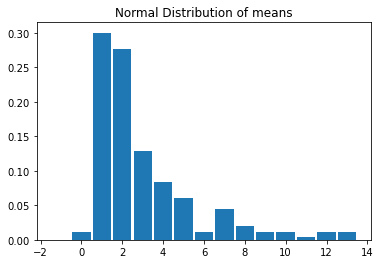

In [22]:
#Here we will find the mean using the batch means method 

l_t, time = CustomersInSystem(a_t,c_t) #retreiving jobs in the system 
plt.close()

rows = 250 #setting the rows 
col= (len(l_t) - 501)/rows #setting the coloums 
batches = np.arange(int(rows*col)).reshape(rows,int(col)) #setting up the 2d array 
timePerBatch = np.arange(int(rows*col)).reshape(rows,int(col))

#this will be an array of shape (250,78) 
#since we consider 20001 data points 501 of which we ignore and split into 250 batches of size 78 

rowCounter = 0 #these will keep tracks of the rows and cols in the batch arrays 
colCounter = 0 

for i in range(len(time)):
    if(i <= 500):
        continue #removing transient part 
    else:
        
        
        batches[rowCounter][colCounter] = l_t[i] #setting the batches 
        timePerBatch[rowCounter][colCounter] = time[i]
        colCounter += 1 
        
        if(colCounter == col): #moving to the next row 
            colCounter = 0 
            rowCounter += 1 
            
        

meanArr = np.arange(rows) #array to hold averages 
for i in range(rows):
    meanArr[i] = AverageCustomers(batches[i],timePerBatch[i])#computing the mean of a batch and storing it in mean array 
    
meanOfMeans = np.mean(meanArr) #computing the mean of means 
print(meanOfMeans) #one notes how the mean of means is close to the point estimate 


my_bins = np.arange(-1,15,1) 
h =np.histogram(meanArr)
h = np.histogram(meanArr,bins=my_bins)
F = h[0]/len(meanArr) #is holding the values of the histogram. The division is to normalise s.t adding the heights makes it sum to 1
B = h[1] #holding the range 
plt.bar(B[:-1],F,width=0.9)
plt.title("Normal Distribution of means")
#The above is expected to plot a normal (not necessarily standard) distribution

In [23]:
#Here will compute the 95% confidence interval with the above mean 

standardError = stats.sem(meanArr) #computing s*[1/sqrt(n)] (the standard error)
zScore = 1.96 #this is obtained from the lookup table of normal distributions

confidenceInterval = [meanOfMeans - zScore*standardError, meanOfMeans + zScore*standardError]
#Confidence Interval computation 

print("95% confidence interval for customers in system: ") 
print(confidenceInterval)
print("\nPoint Estimate: ")
print(pointEst)

95% confidence interval for customers in system: 
[2.820869491892684, 3.5871305081073164]

Point Estimate: 
3.432718985535117
